In this project, we'll dive into the fascinating world of machine learning, specifically focusing on regression models. Using the California housing dataset, our goal is to predict the median house values in different districts. Regression models help us understand how various features of data, like location, house size, and number of rooms, influence house prices. By building and refining these models, we aim to uncover meaningful insights that can guide decisions in real estate investments and policy making. Let's get started on this analytical journey to demystify how data can predict housing market trends!

## Description of Variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.shape

(20640, 10)

In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.25)

In [5]:
train_set.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        152
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
test_set.isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        55
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

In [7]:
train_y = train_set[['median_house_value']]
test_y = test_set[['median_house_value']]

train_inputs = train_set.drop(['median_house_value'], axis=1)
test_inputs = test_set.drop(['median_house_value'], axis=1)

In [8]:
train_inputs.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
dtype: object

In [9]:
# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

# Identify the categorical columns
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()

In [10]:
numeric_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [11]:
categorical_columns

['ocean_proximity']

## Pipeline

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer


In [13]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())])

In [14]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [15]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
],
        remainder='drop')

#passtrough is an optional step. You don't have to use it.

## Visualizing features vs data

<Axes: xlabel='housing_median_age', ylabel='Count'>

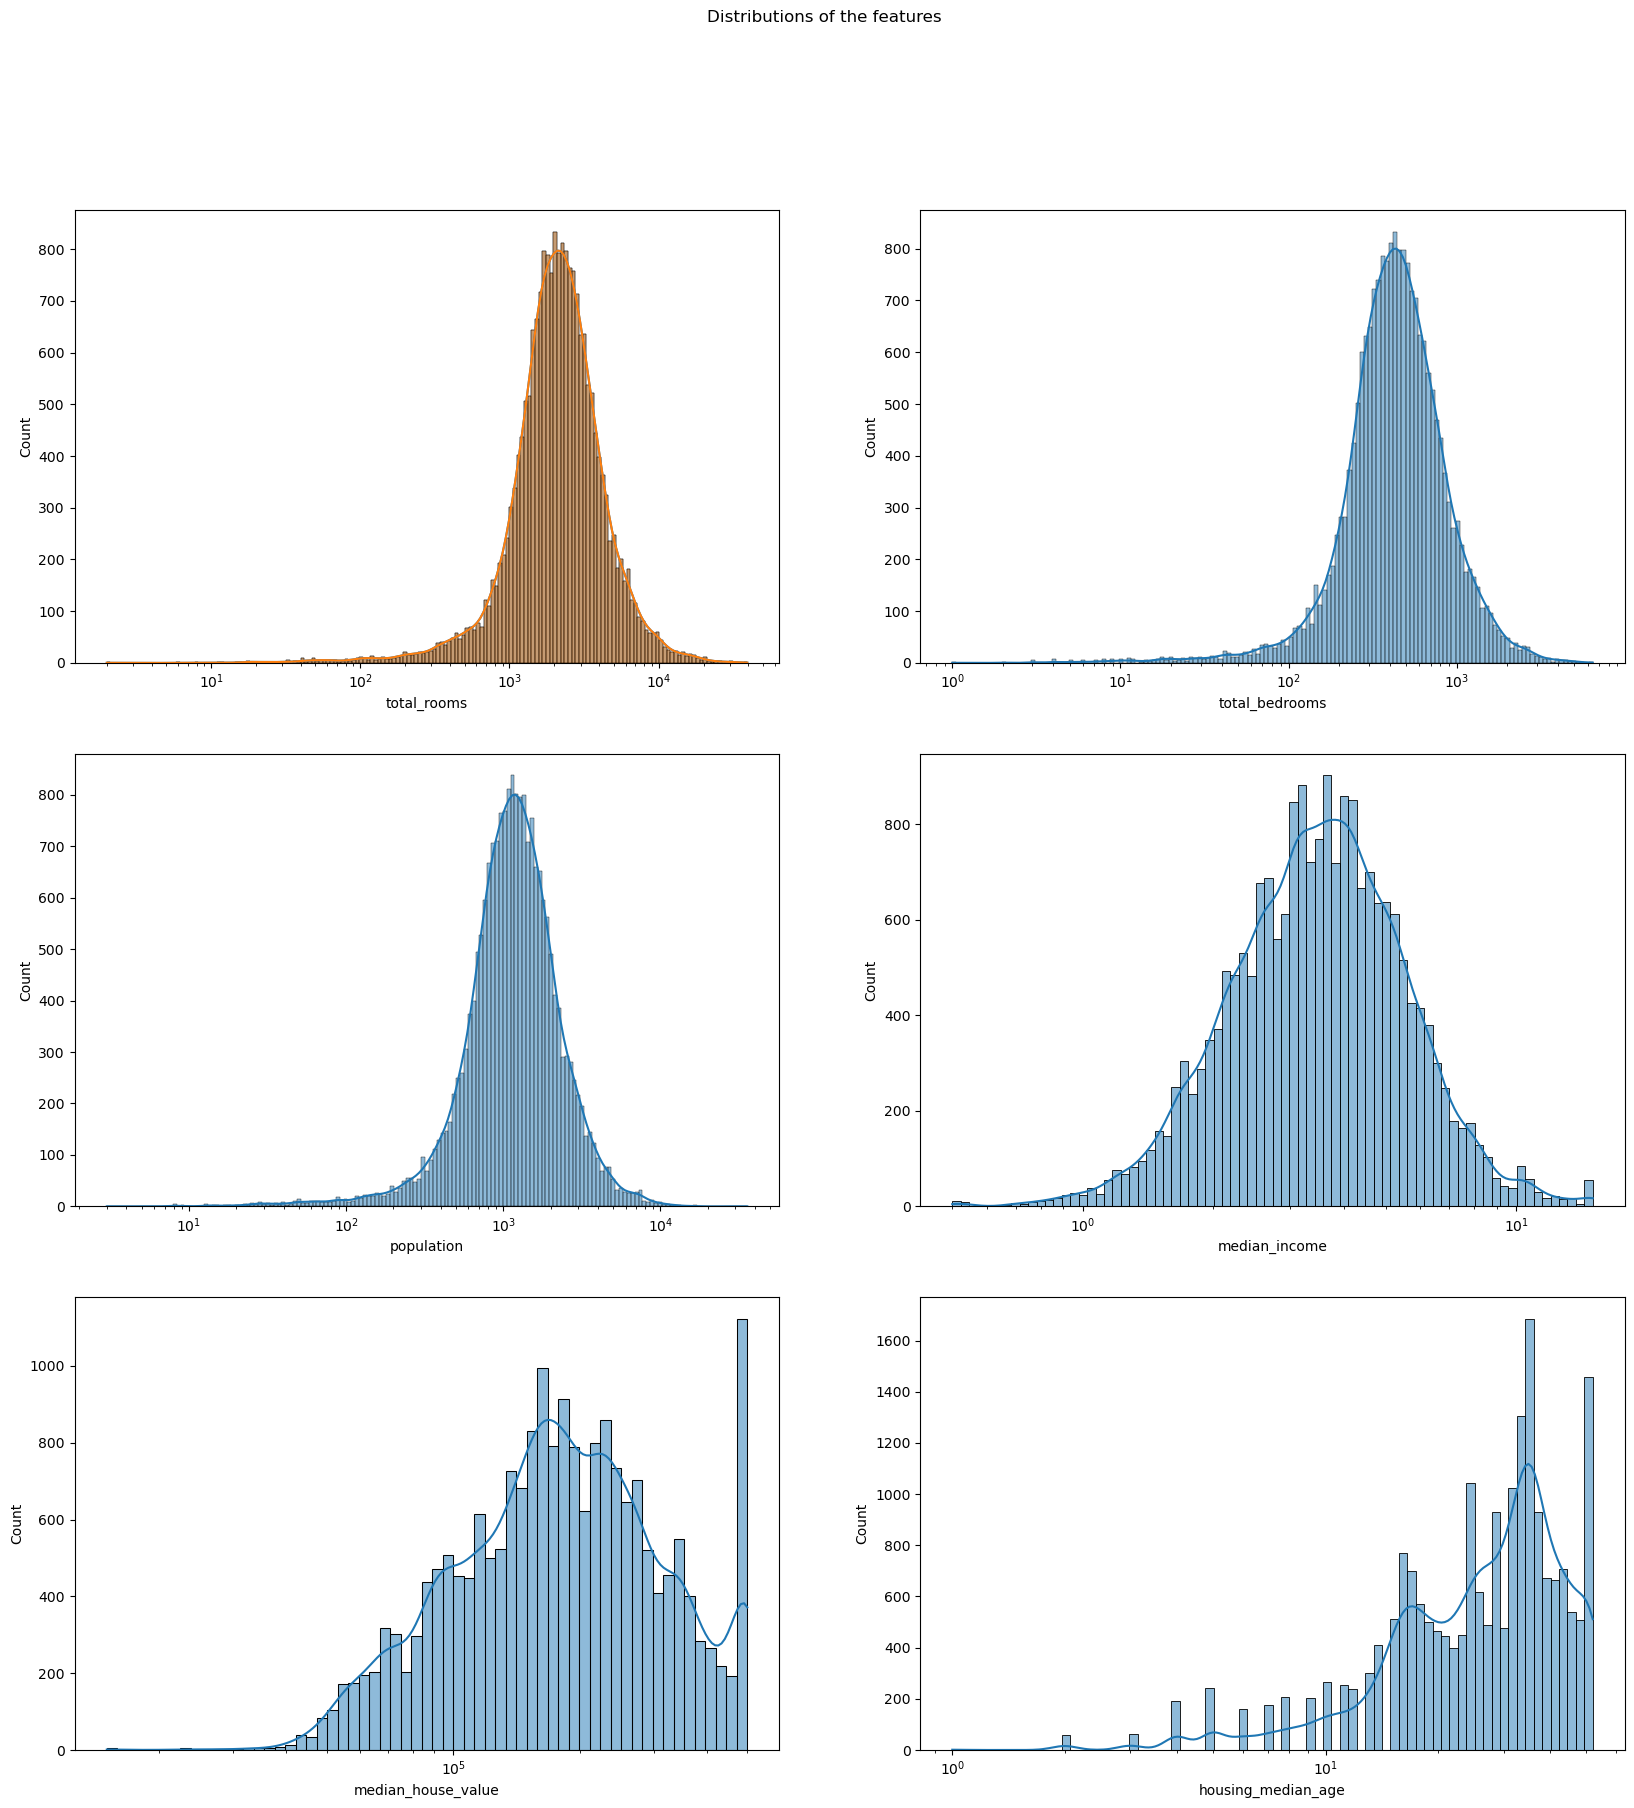

In [16]:
#since all features almost extreme right skewed we used log_scale=true to visualize the distribution
fig,ax=plt.subplots(3,2,figsize=(20,20))
fig.suptitle('Distributions of the features')
sns.histplot(ax=ax[0,0],data= data,x='total_rooms',kde=True,log_scale=True)
sns.histplot(ax=ax[0,0],data=data,x='total_rooms',kde=True,log_scale=False)
sns.histplot(ax=ax[0,1],data=data,x='total_bedrooms',kde=True,log_scale=True)
sns.histplot(ax=ax[1,0],data=data,x='population',kde=True,log_scale=True)
sns.histplot(ax=ax[1,1],data=data,x='median_income',kde=True,log_scale=True)
sns.histplot(ax=ax[2,0],data=data,x='median_house_value',kde=True,log_scale=True)
sns.histplot(ax=ax[2,1],data=data,x='housing_median_age',kde=True,log_scale=True)

## Visualizing features vs target 

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

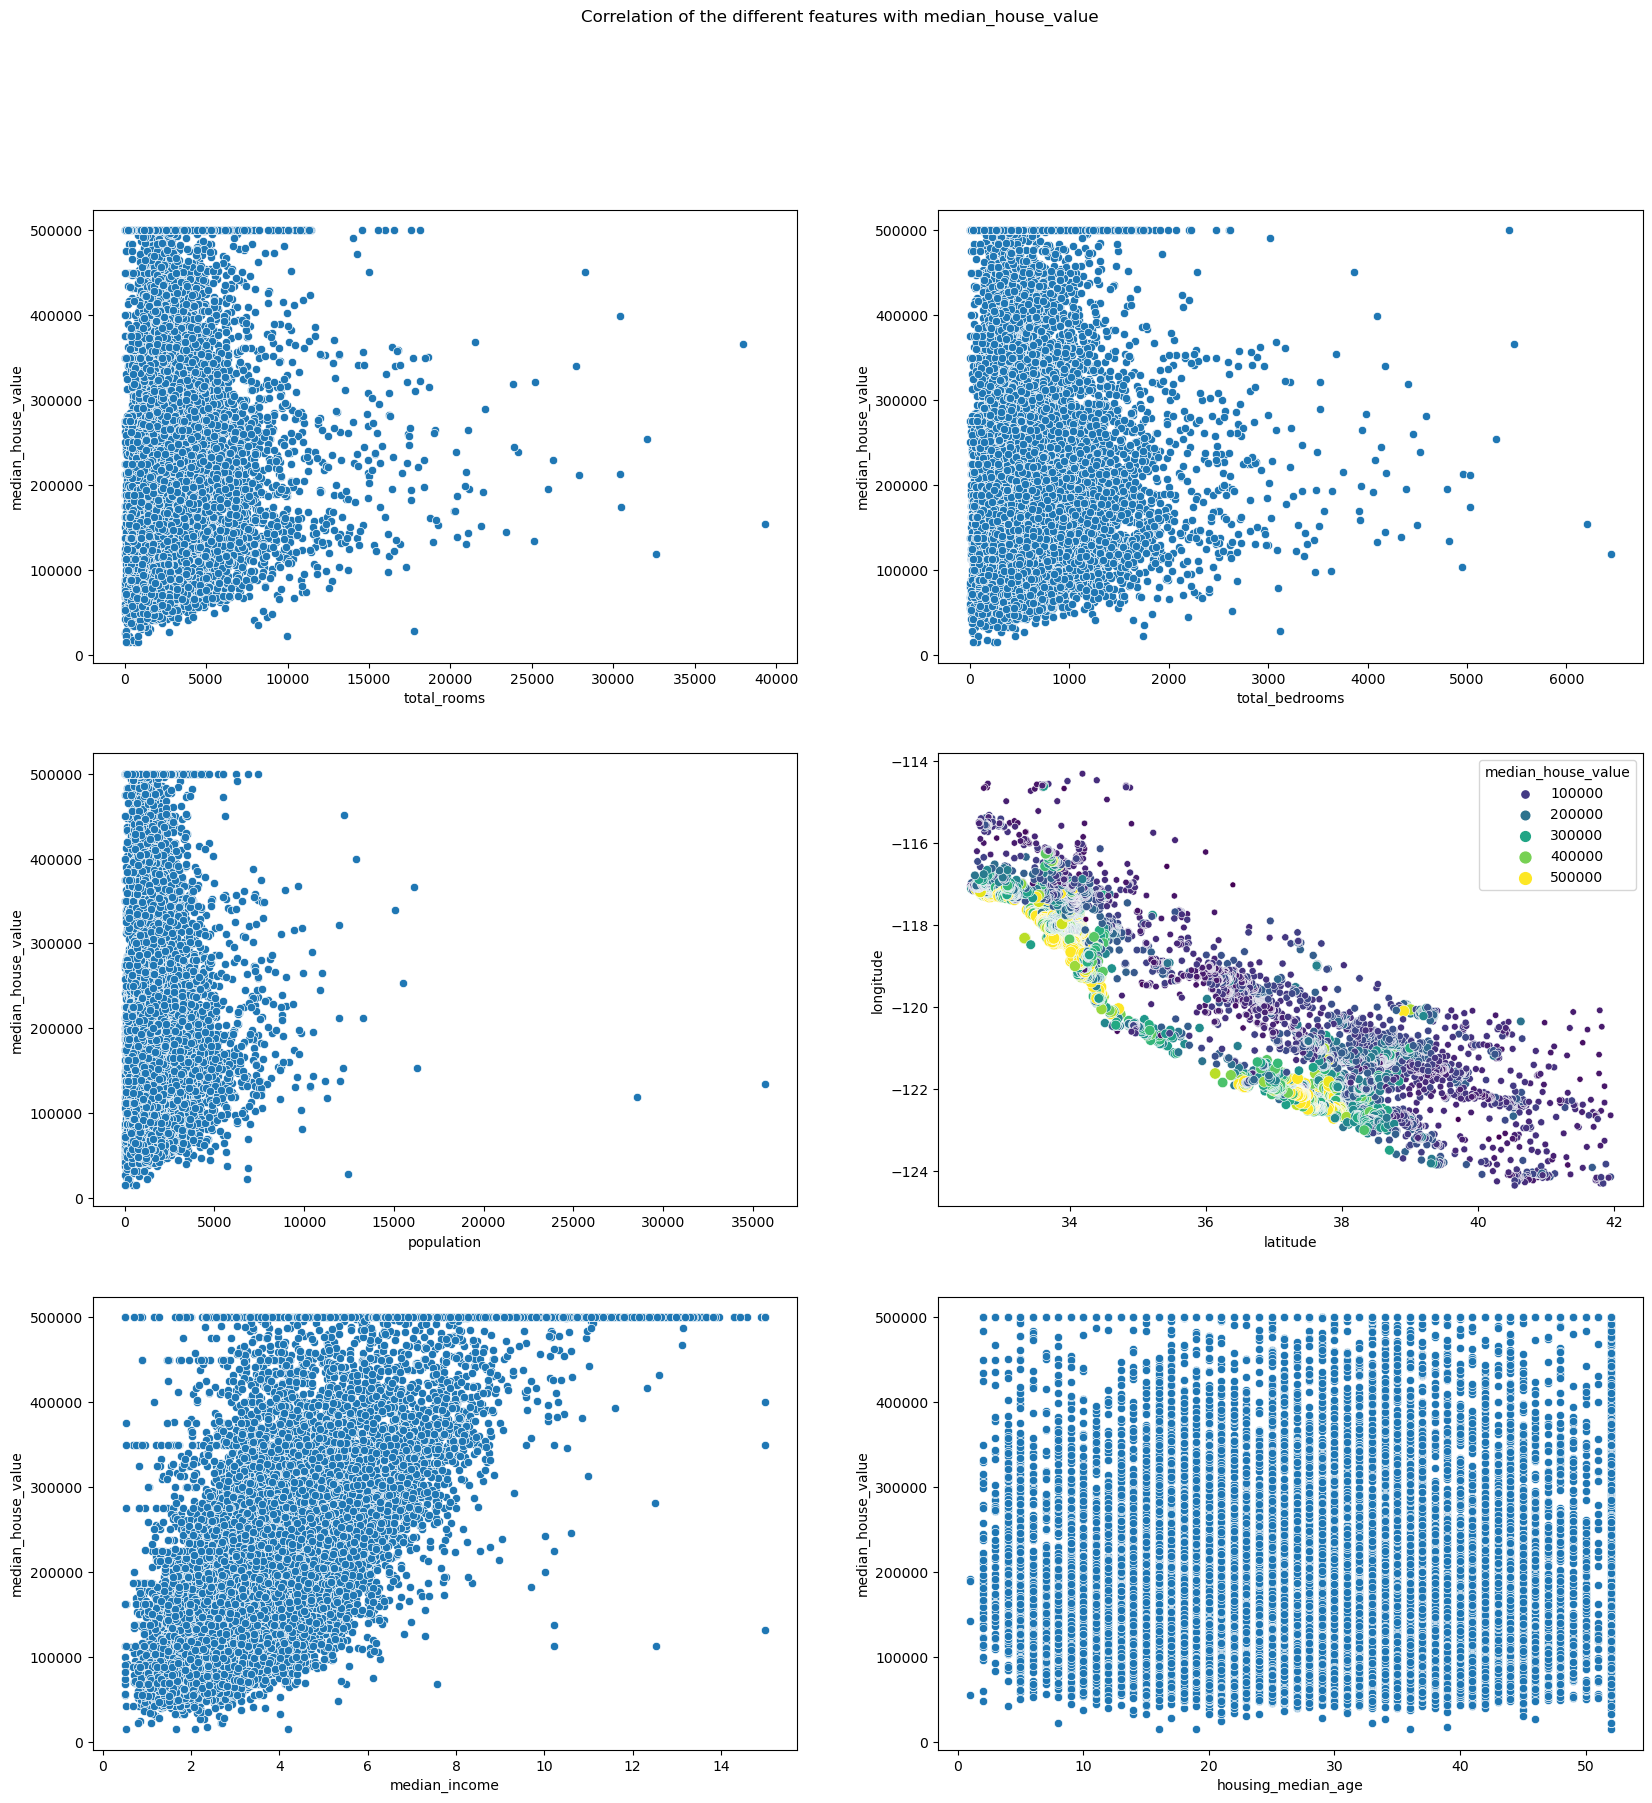

In [17]:
fig,ax=plt.subplots(3,2,figsize=(20,20))
fig.suptitle('Correlation of the different features with median_house_value ')
sns.scatterplot(ax=ax[0,0],data=data,x='total_rooms',y='median_house_value')
sns.scatterplot(ax=ax[0,1],data=data,x='total_bedrooms',y='median_house_value')
sns.scatterplot(ax=ax[1,0],data=data,x='population',y='median_house_value')
sns.scatterplot(ax=ax[1,1],data=data,x='latitude',y='longitude',hue='median_house_value',size='median_house_value',palette='viridis')
sns.scatterplot(ax=ax[2,0],data=data,x='median_income',y='median_house_value')
sns.scatterplot(ax=ax[2,1],data=data,x='housing_median_age',y='median_house_value')

In [18]:
train_inputs.nunique()

longitude               820
latitude                834
housing_median_age       52
total_rooms            5342
total_bedrooms         1790
population             3583
households             1683
median_income         10367
ocean_proximity           5
dtype: int64

In [19]:
test_inputs.nunique()

longitude              681
latitude               684
housing_median_age      52
total_rooms           3173
total_bedrooms        1281
population            2370
households            1234
median_income         4216
ocean_proximity          5
dtype: int64

In [20]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_set)

train_x

array([[ 0.80907238, -0.89923807, -1.00044761, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23034815,  0.87149986, -0.92118233, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77915424, -0.81046757, -0.20779484, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.15056642,  0.79674575,  1.85310234, ...,  0.        ,
         0.        ,  0.        ],
       [-0.36770817,  1.11445071, -1.39677399, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.70934522, -0.74505773,  0.82265375, ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
train_x.shape

(15480, 13)

In [22]:
# Transform the test data
test_x = preprocessor.transform(test_inputs)

test_x

array([[-1.42980248,  0.98830315, -0.04926429, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.68441343, -0.85718889,  1.06044958, ...,  0.        ,
         0.        ,  1.        ],
       [-0.866344  ,  1.08641792,  1.85310234, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.15811746, -1.33374633,  0.58485792, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.22294012, -1.37112338, -1.15897816, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.69438614, -0.84317249,  0.82265375, ...,  0.        ,
         0.        ,  1.        ]])

In [23]:
test_x.shape

(5160, 13)

## Baseline

In [24]:
# Sci-kit Learn's DummyRegressor automates the entire process performed manually above.
# First, you instantiate it with the "mean" strategy. 
# Then, you fit the model. This finds the mean value of the target (in the training set).
np.random.seed(10)

from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")

dummy_regr.fit(train_x, train_y)

DummyRegressor()

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
# Then, you call the predict function of the regressor.
# This predicts all values as the mean value.
# In the next step, you compare the predicted values with the actual values to calculate mean squared error
# Taking the square root gives you "root mean squared error"
# This is the baseline Train RMSE

dummy_train_pred = dummy_regr.predict(train_x)

baseline_train_mse = mean_squared_error(train_y, dummy_train_pred)

baseline_train_rmse = np.sqrt(baseline_train_mse)

print('Baseline Train RMSE: {}' .format(baseline_train_rmse))

Baseline Train RMSE: 115746.79617862815


In [27]:
# We repeat the same steps for the test set
# This is the baseline Test RMSE

dummy_test_pred = dummy_regr.predict(test_x)

baseline_test_mse = mean_squared_error (test_y, dummy_test_pred)

baseline_test_rmse = np.sqrt(baseline_test_mse)

print('Baseline Test RMSE: {}' .format(baseline_test_rmse))

Baseline Test RMSE: 114324.8805284074


## Decision Tree Regression

In [28]:
np.random.seed(10)
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=4,min_samples_leaf = 4) 

tree_reg.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=4)

In [29]:
#Train RMSE
train_pred = tree_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Decision Tree Train RMSE: {}' .format(train_rmse))

Decision Tree Train RMSE: 73026.84610257752


In [30]:
#Test RMSE
test_pred = tree_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Decision Tree Test RMSE: {}' .format(test_rmse))

Decision Tree Test RMSE: 71087.62476693645


## Voting Regressor

In [31]:
np.random.seed(10)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.svm import SVR 
from sklearn.ensemble import VotingRegressor


dtree_reg = DecisionTreeRegressor(max_depth=9)
svm_reg = SVR(kernel="rbf", C=5, epsilon=0.001, gamma='scale') 
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3)

voting_reg = VotingRegressor(
            estimators=[('dt', dtree_reg), 
                        ('svr', svm_reg), 
                        ('sgd', sgd_reg)])

voting_reg.fit(train_x, train_y)

C:\Users\neera\anaconda3\Lib\site-packages\sklearn\ensemble\_voting.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('dt', DecisionTreeRegressor(max_depth=9)),
                            ('svr', SVR(C=5, epsilon=0.001)),
                            ('sgd', SGDRegressor(max_iter=10000))])

In [32]:
#Train RMSE
train_pred = voting_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Voting Reg Train RMSE: {}' .format(train_rmse))

Voting Reg Train RMSE: 67924.71862765399


In [33]:
#Test RMSE
test_pred = voting_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Voting Reg Test RMSE: {}' .format(test_rmse))

Voting Reg Test RMSE: 68825.21467163498


In [34]:
for reg in (dtree_reg, svm_reg, sgd_reg, voting_reg):
    reg.fit(train_x, train_y['median_house_value'])
    test_y_pred = reg.predict(test_x)
    print(reg.__class__.__name__, 'Test rmse=', np.sqrt(mean_squared_error(test_y, test_y_pred)))

DecisionTreeRegressor Test rmse= 60327.206635091105
SVR Test rmse= 115574.61625586668
SGDRegressor Test rmse= 66938.14204970555
VotingRegressor Test rmse= 68874.04540691627


## Gradient Boosting

In [35]:
#Use GradientBoosting
np.random.seed(10)

from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.05) 

gb_reg.fit(train_x, train_y)

C:\Users\neera\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.05, max_depth=2)

In [36]:
#Train RMSE
train_pred = gb_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Gradientboost Train RMSE: {}' .format(train_rmse))

Gradientboost Train RMSE: 67178.28817793314


In [37]:
#Test RMSE
test_pred = gb_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Gradientboost Test RMSE: {}' .format(test_rmse))

Gradientboost Test RMSE: 65162.386855731376


## Simple Neural Network

In [38]:
np.random.seed(10)
from sklearn.neural_network import MLPRegressor
#Default settings create 1 hidden layer with 100 neurons
mlp_reg = MLPRegressor(hidden_layer_sizes=(75,), max_iter=1500)

mlp_reg.fit(train_x, train_y)

C:\Users\neera\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\neera\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(75,), max_iter=1500)

In [39]:
#Train RMSE
train_pred = mlp_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Neural Network Train RMSE: {}' .format(train_rmse))

Neural Network Train RMSE: 66681.75422231278


In [40]:
#Test RMSE
test_pred = mlp_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Neural Network Test RMSE: {}' .format(test_rmse))

Neural Network Test RMSE: 64512.17477974518


Baseline Train RMSE: 115746.79617862815

Baseline Test RMSE: 114324.8805284074


Decision Tree Train RMSE: 73026.84610257752

Decision Tree Test RMSE: 71087.62476693645


Voting Reg Train RMSE: 67924.71862765399

Voting Reg Test RMSE: 68825.21467163498


Gradientboost Train RMSE: 67178.28817793314

Gradientboost Test RMSE: 65162.386855731376


Neural Network Train RMSE: 66681.75422231278

Neural Network Test RMSE: 64512.17477974518


In reviewing the results from our regression models, we observed significant improvements over the baseline. The baseline model had the highest errors, indicating a poor fit. Each specialized model reduced the RMSE values, indicating better prediction accuracy. The Decision Tree model showed good improvement, while the Voting Regressor and Gradient Boost models further refined predictions. The Neural Network achieved the best results, with the lowest RMSE scores on both training and test sets, suggesting it is most effective at capturing complex patterns in the data. Overall, our model enhancements successfully increased accuracy in predicting California housing prices.